# Exploratory Data Analysis (EDA) With Python and Pandas

## Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

### Import libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

### Context

The growth in supermarkets in most populated cities are increasing, along with marketing competition rising. This data contains historical sales data for a supermarket chain with 3 months of data spanning across 3 branches

### Data Dictionary

1. **Invoice id**: Computer generated sales slip invoice identification number
2. **Branch**: Branch of supercenter (3 branches are available, identified as A, B and C)
3. **City**: Location of supercenters
4. **Customer type**: Types of customers, recorded by Members for customers using member card and Normal for without member cards
6. **Gender**: Gender of customer
7. **Product line**: General item categorization groups - Electronic accessories, fashion accessories, food and beverages, health and beauty, home and lifestyle, sports and travel related products
8. **Unit price**: Price of each in USD
9. **Quantity**: Quantity of product purchased by customer
10. **Tax**: 5% tax fee for purchase
11. **Total**: Total price, including tax
12. **Date**: Date of purchase (records available from January-March 2019)
13. **Time**: Purchase time (10 am to 9 pm)
14. **Payment**: Payment type used by customer for purchase (Cash, credit, or eWallet)
15. **COGS**: 'Cost of goods sold'
16. **Gross margin percentage**: Gross margin, in percentage
17. **Gross income**: Gross income
18. **Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1-10)
   

## Task 1: Initial Data Exploration

In [81]:
# Reading CSV file and applying to 'df' variable
df = pd.read_csv('supermarket_sales.csv') 

In [82]:
# Viewing data types column, along with their names
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [83]:
# Date column seems to be an 'object' data type. Converting to 'datetime' data type
df['Date'] = pd.to_datetime(df['Date'], format="mixed")

# Capitalizing first letter of column headers for consistency
df = df.rename(str.capitalize, axis="columns")

In [85]:
df.head(10) # Showing first 10 rows of dataset

,Invoice id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cogs,Gross margin percentage,Gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,NaN,36.26,2.0,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,NaN,54.84,3.0,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [86]:
# General statistical information for each column header
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Cogs,Gross margin percentage,Gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,2019-02-14 00:18:39.840478464,308.007358,4.761905e+00,15.400368,6.972682
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,2019-01-24 00:00:00,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,2019-02-13 00:00:00,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,2019-03-08 00:00:00,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.000000,4.761905e+00,49.650000,10.000000
std,26.510165,2.924673,11.715192,246.019028,NaN,234.303836,6.131488e-14,11.715192,1.717647


## Task 2: Univariate Analysis

#### **Question 1**: Is there a relationship between gross income and customer ratings?

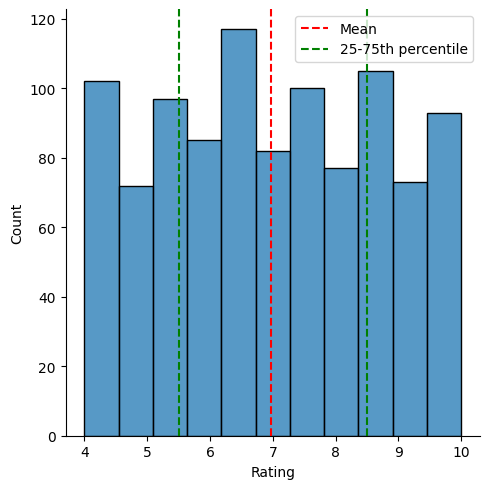

In [87]:
# plotting a distribution plot for the Rating column using the Seaborn package
sns.displot(df['Rating'])
# showing the 'mean' rating using a vertical line
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='Mean')
# showing the 25th and 75th percentile
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Cogs'}>,
        <Axes: title={'center': 'Gross margin percentage'}>],
       [<Axes: title={'center': 'Gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

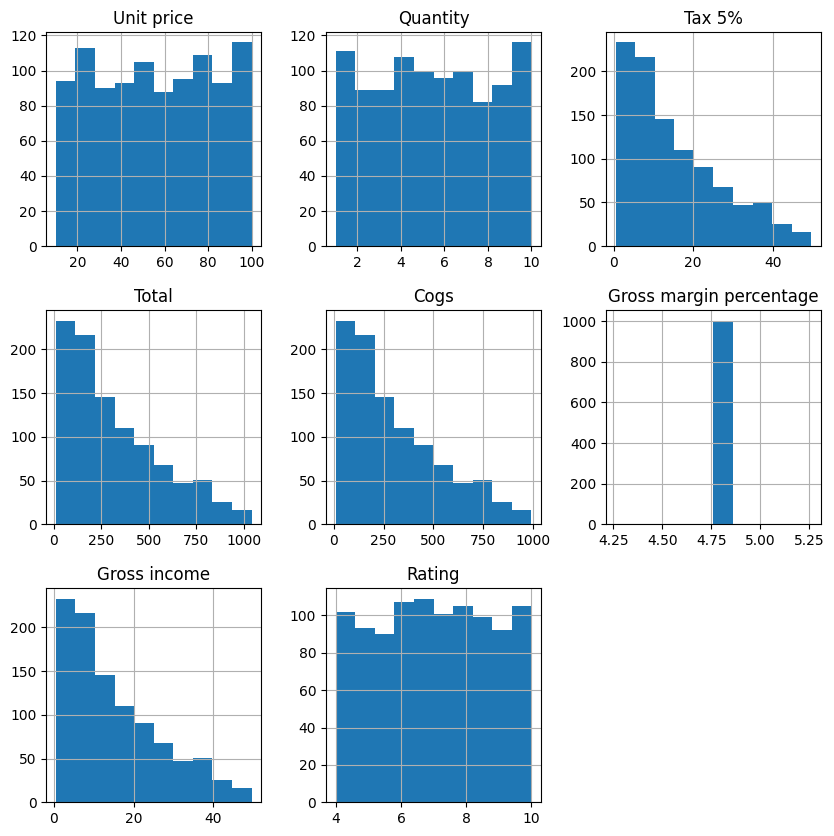

In [88]:
# numerical distributions among the dataframe columns
df.drop(['Date'], axis=1).hist(figsize=(10, 10))

#### **Question 2**: Do aggregate sales numbers differ by much between branches?

<Axes: xlabel='Branch', ylabel='count'>

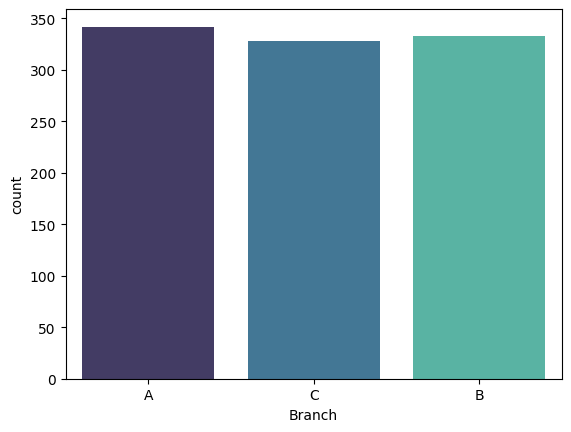

In [89]:
# since each row in the dataframe represents a sale, we can use countplot to view sales among branches
sns.countplot(df, x="Branch", hue="Branch", palette="mako")

<Axes: xlabel='Payment', ylabel='count'>

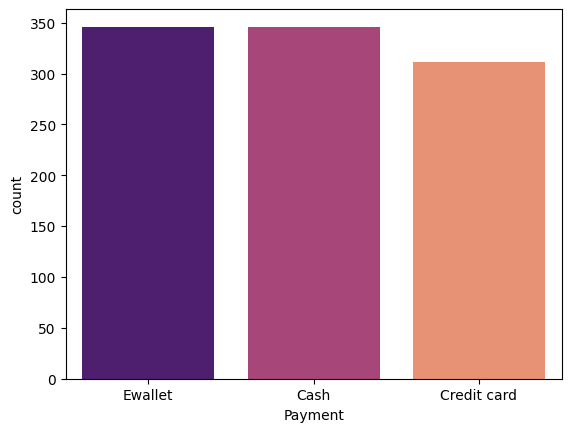

In [90]:
# comparing pay methods for sale transactions
sns.countplot(df, x="Payment", hue="Payment", palette="magma")

## Task 3: Bivariate Analysis

#### **Question 1**: Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='Gross income'>

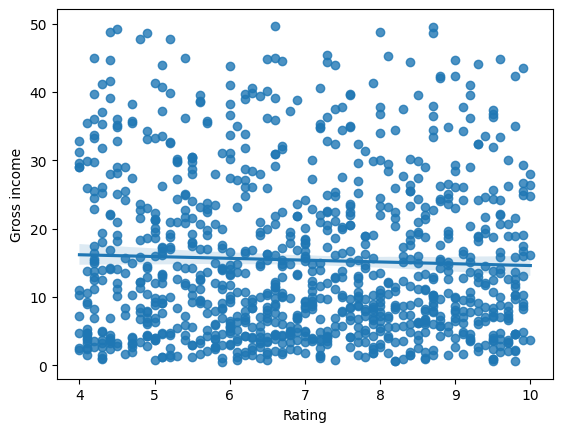

In [92]:
# using a regplot to plot a comparison between gross income and customer ratings
sns.regplot(df, x="Rating", y="Gross income")

<Axes: xlabel='Branch', ylabel='Gross income'>

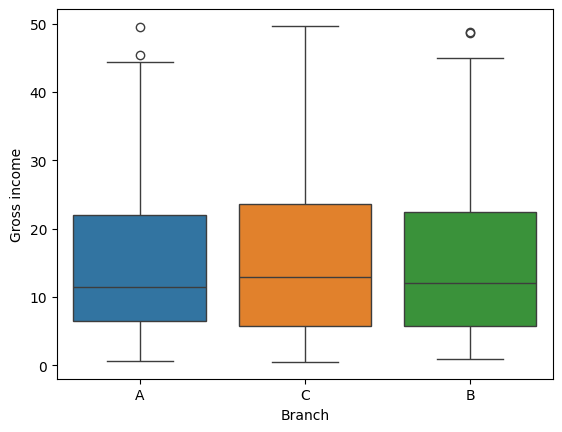

In [93]:
# using a boxplot to compare gross income between the 3 different branches
sns.boxplot(df, x="Branch", y="Gross income", hue="Branch")

## Task 4: Dealing With Duplicate Rows and Missing Values

In [94]:
# showing number of duplicated rows
df.duplicated().sum()

3

In [95]:
# showing duplicated rows
df[df.duplicated() == True]

,Invoice id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cogs,Gross margin percentage,Gross income,Rating
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,2019-03-10,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,2019-01-26,15:17,Cash,609.56,4.761905,30.478,5.5


In [96]:
# dropping duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [97]:
# missing/NA values per column
df.isna().sum()

Invoice id                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
Cogs                        0
Gross margin percentage     0
Gross income                0
Rating                      0
dtype: int64

<Axes: >

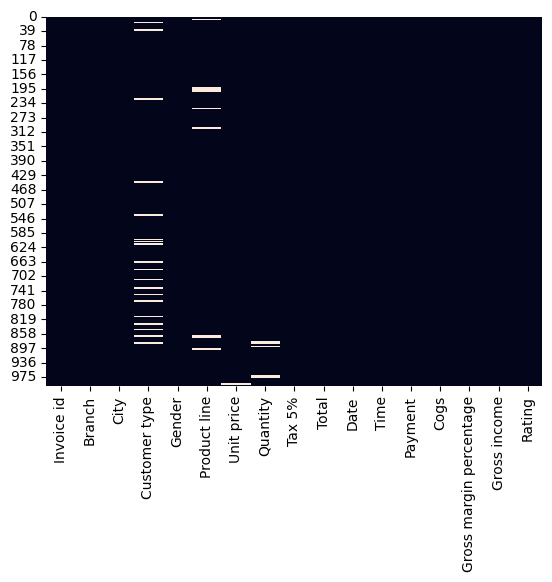

In [98]:
# viewing missing values as a heatmap
sns.heatmap(df.isna(), cbar=False)

<Axes: >

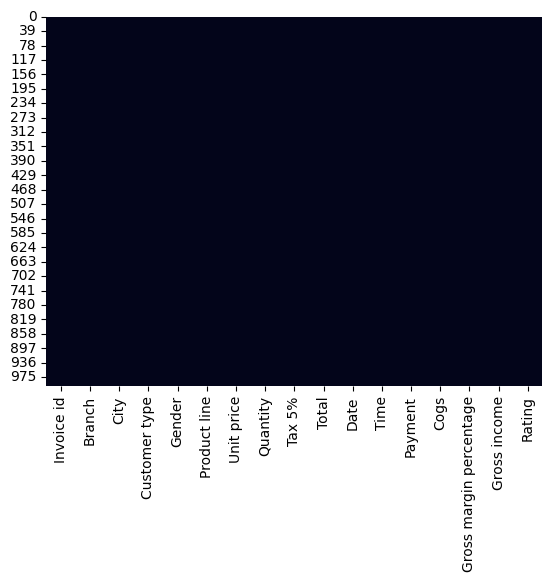

In [99]:
# replacing missing values with the most repeated values (mode)
df.fillna(df.mode().iloc[0], inplace=True)
sns.heatmap(df.isna(), cbar=False)

## Task 5: Correlation Analysis

In [100]:
# showing correlation between all numeric columns
np.round(df.corr(numeric_only=True), 2)

,Unit price,Quantity,Tax 5%,Total,Cogs,Gross margin percentage,Gross income,Rating
Unit price,1.00,0.01,0.62,0.62,0.62,NaN,0.62,-0.01
Quantity,0.01,1.00,0.69,0.69,0.69,NaN,0.69,-0.01
Tax 5%,0.62,0.69,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.62,0.69,1.00,1.00,1.00,NaN,1.00,-0.04
Cogs,0.62,0.69,1.00,1.00,1.00,NaN,1.00,-0.04
Gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross income,0.62,0.69,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.01,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<Axes: >

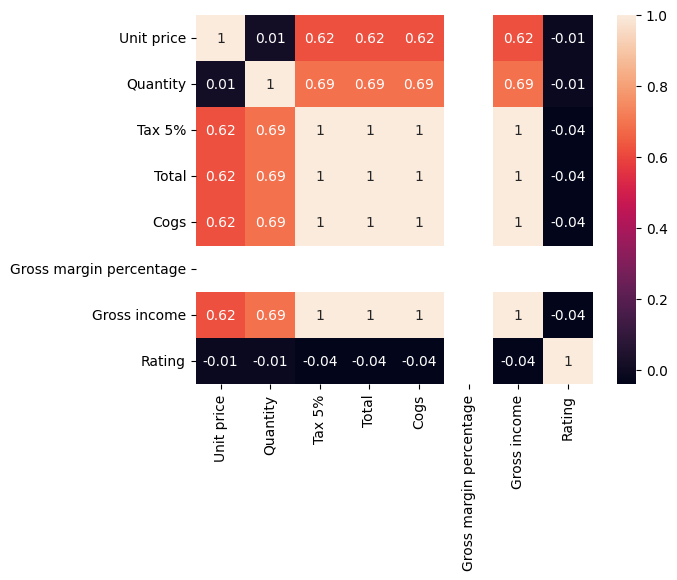

In [101]:
sns.heatmap(np.round(df.corr(numeric_only=True), 2), annot=True)